<a href="https://colab.research.google.com/github/parthhasstartedcoding/Financial-Programming/blob/main/D%26AV_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import yfinance as yf
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [ ]:
# Define the tickers for Apple and Google
apple_ticker = 'AAPL'
google_ticker = 'GOOGL'

# Define the date range for the last quarter
start_date = '2023-07-01'
end_date = '2023-09-30'

# Fetch historical stock price data using yfinance
apple_data = yf.download(apple_ticker, start=start_date, end=end_date)
google_data = yf.download(google_ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Calculate daily returns
apple_data['Daily_Return'] = apple_data['Adj Close'].pct_change()
google_data['Daily_Return'] = google_data['Adj Close'].pct_change()

In [ ]:
# Create a figure to visualize the daily returns
fig = go.Figure()

fig.add_trace(go.Scatter(x=apple_data.index, y=apple_data['Daily_Return'],
                         mode='lines', name='Apple', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=google_data.index, y=google_data['Daily_Return'],
                         mode='lines', name='Google', line=dict(color='green')))

fig.update_layout(title='Daily Returns for Apple and Google (Last Quarter)',
                  xaxis_title='Date', yaxis_title='Daily Return',
                  legend=dict(x=0.02, y=0.95))

fig.show()

In [ ]:
# Calculate cumulative returns for the last quarter
apple_cumulative_return = (1 + apple_data['Daily_Return']).cumprod() - 1
google_cumulative_return = (1 + google_data['Daily_Return']).cumprod() - 1

# Create a figure to visualize the cumulative returns
fig = go.Figure()

fig.add_trace(go.Scatter(x=apple_cumulative_return.index, y=apple_cumulative_return,
                         mode='lines', name='Apple', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=google_cumulative_return.index, y=google_cumulative_return,
                         mode='lines', name='Google', line=dict(color='green')))

fig.update_layout(title='Cumulative Returns for Apple and Google (Last Quarter)',
                  xaxis_title='Date', yaxis_title='Cumulative Return',
                  legend=dict(x=0.02, y=0.95))

fig.show()

In [ ]:
# Calculate historical volatility (standard deviation of daily returns)
apple_volatility = apple_data['Daily_Return'].std()
google_volatility = google_data['Daily_Return'].std()

# Create a figure to compare volatility
fig1 = go.Figure()
fig1.add_bar(x=['Apple', 'Google'], y=[apple_volatility, google_volatility],
             text=[f'{apple_volatility:.4f}', f'{google_volatility:.4f}'],
             textposition='auto', marker=dict(color=['blue', 'green']))

fig1.update_layout(title='Volatility Comparison (Last Quarter)',
                   xaxis_title='Stock', yaxis_title='Volatility (Standard Deviation)',
                   bargap=0.5)
fig1.show()

In [ ]:
market_data = yf.download('^GSPC', start=start_date, end=end_date)  # S&P 500 index as the market benchmark

# Calculate daily returns for both stocks and the market
apple_data['Daily_Return'] = apple_data['Adj Close'].pct_change()
google_data['Daily_Return'] = google_data['Adj Close'].pct_change()
market_data['Daily_Return'] = market_data['Adj Close'].pct_change()

# Calculate Beta for Apple and Google
cov_apple = apple_data['Daily_Return'].cov(market_data['Daily_Return'])
var_market = market_data['Daily_Return'].var()

beta_apple = cov_apple / var_market

cov_google = google_data['Daily_Return'].cov(market_data['Daily_Return'])
beta_google = cov_google / var_market

# Compare Beta values
if beta_apple > beta_google:
    conclusion = "Apple is more volatile (higher Beta) compared to Google."
else:
    conclusion = "Google is more volatile (higher Beta) compared to Apple."

# Print the conclusion
print("Beta for Apple:", beta_apple)
print("Beta for Google:", beta_google)
print(conclusion)

[*********************100%%**********************]  1 of 1 completed
Beta for Apple: 1.2257459204729633
Beta for Google: 1.53030690283569
Google is more volatile (higher Beta) compared to Apple.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


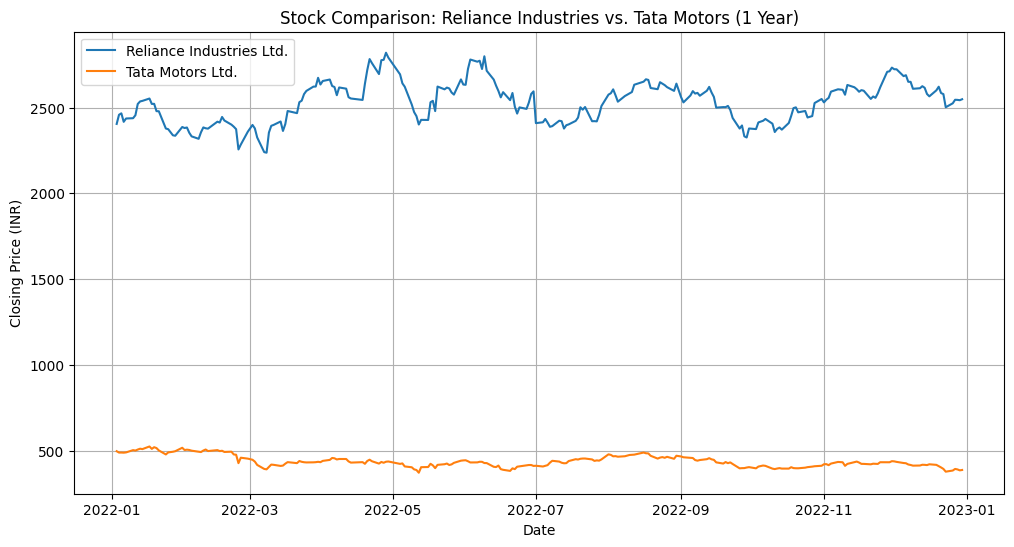

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the stock symbols
reliance_symbol = "RELIANCE.BO"
tata_motors_symbol = "TATAMOTORS.BO"

# Set the start and end dates for fetching historical data (1-year period)
start_date = "2022-01-01"
end_date = "2023-01-01"

# Fetch historical stock data using yfinance
reliance_data = yf.download(reliance_symbol, start=start_date, end=end_date)
tata_motors_data = yf.download(tata_motors_symbol, start=start_date, end=end_date)

# Plotting the closing prices for the two stocks
plt.figure(figsize=(12, 6))
plt.plot(reliance_data['Close'], label='Reliance Industries Ltd.')
plt.plot(tata_motors_data['Close'], label='Tata Motors Ltd.')
plt.title("Stock Comparison: Reliance Industries vs. Tata Motors (1 Year)")
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.legend()
plt.grid(True)
plt.show()


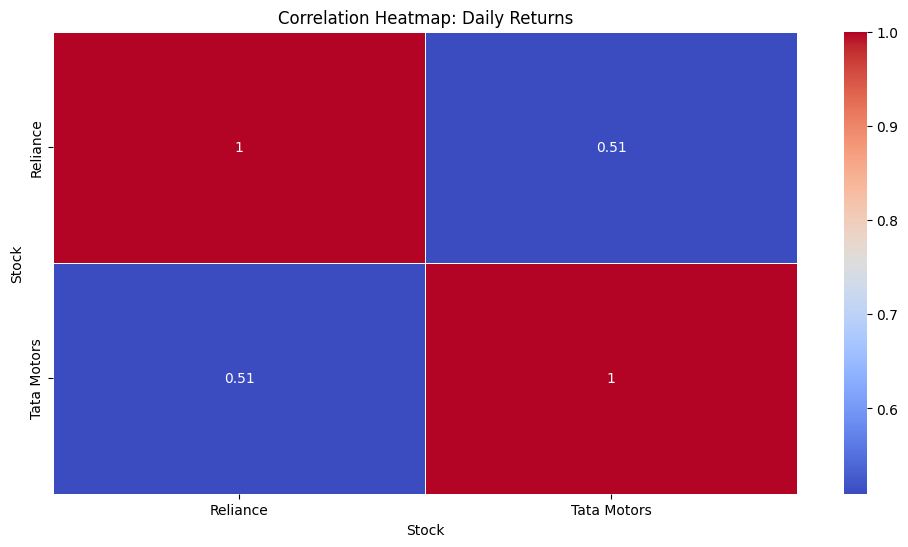

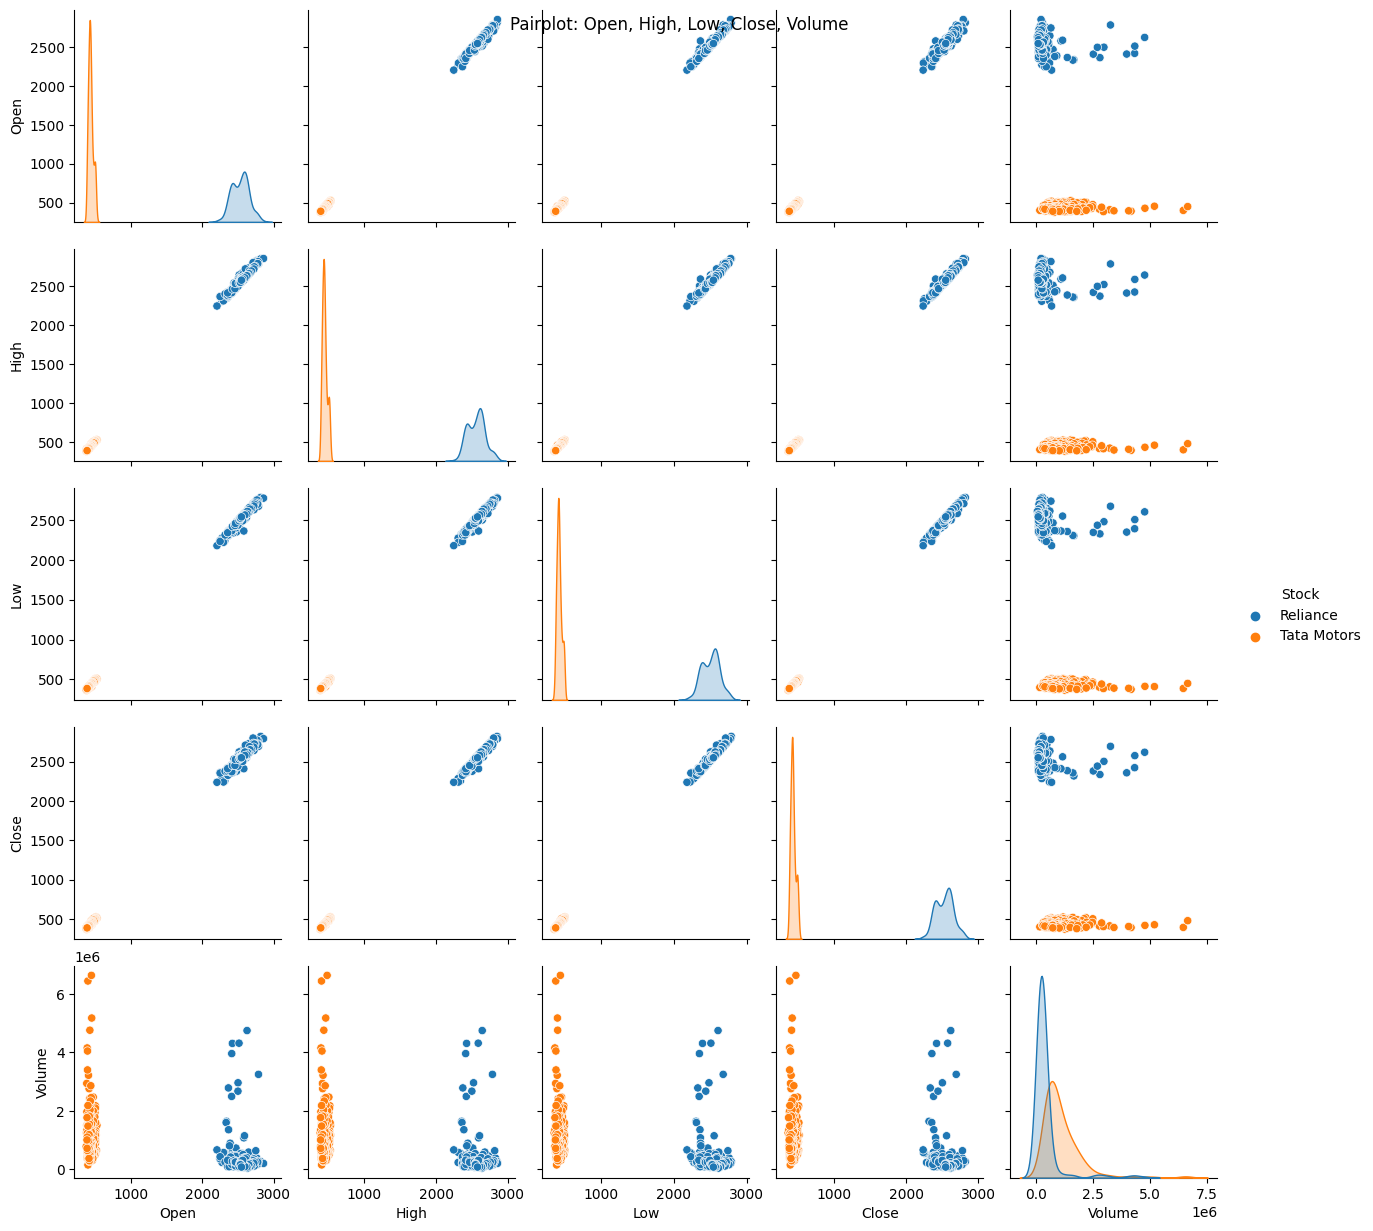

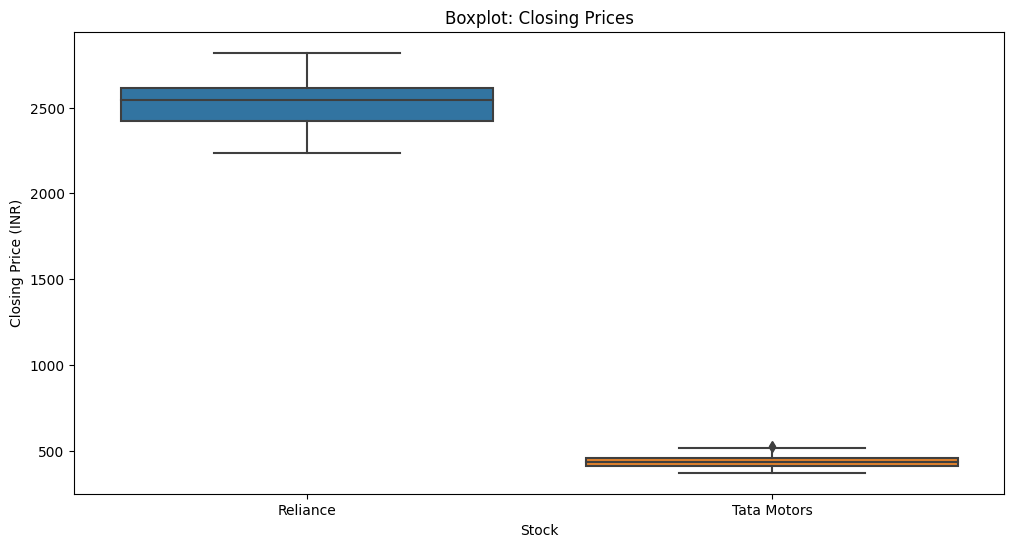

In [ ]:



# Combine the data for easier comparison
reliance_data['Stock'] = 'Reliance'
tata_motors_data['Stock'] = 'Tata Motors'
combined_data = pd.concat([reliance_data, tata_motors_data])

# Create a heatmap for daily returns
plt.figure(figsize=(12, 6))
heatmap_data = combined_data.pivot_table(values='Close', index=combined_data.index.date, columns='Stock')
sns.heatmap(heatmap_data.pct_change().corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap: Daily Returns")
plt.show()

# Create pairplot for daily returns
sns.pairplot(combined_data, hue='Stock', vars=['Open', 'High', 'Low', 'Close', 'Volume'])
plt.suptitle("Pairplot: Open, High, Low, Close, Volume")
plt.show()

# Create boxplots for closing prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stock', y='Close', data=combined_data)
plt.title("Boxplot: Closing Prices")
plt.ylabel("Closing Price (INR)")
plt.show()


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


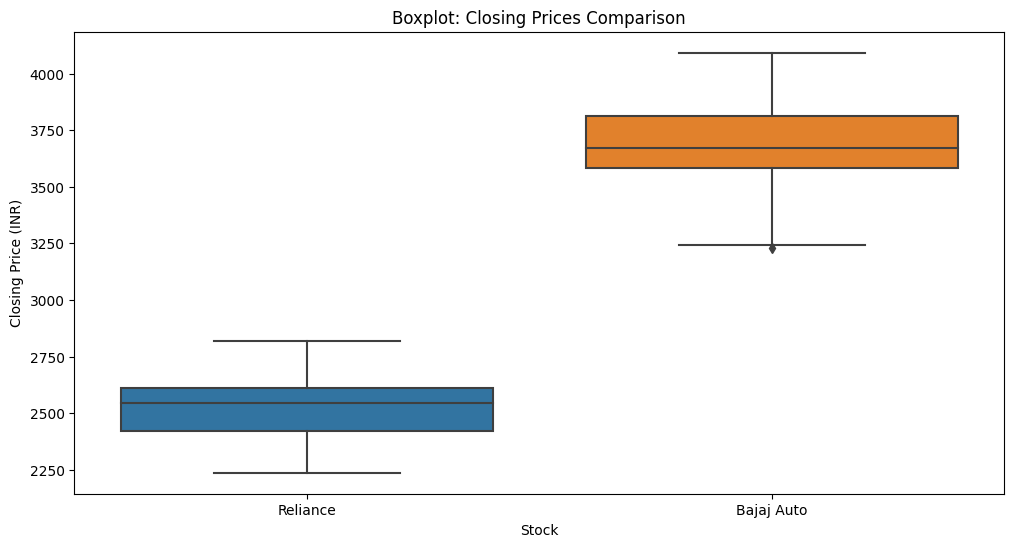

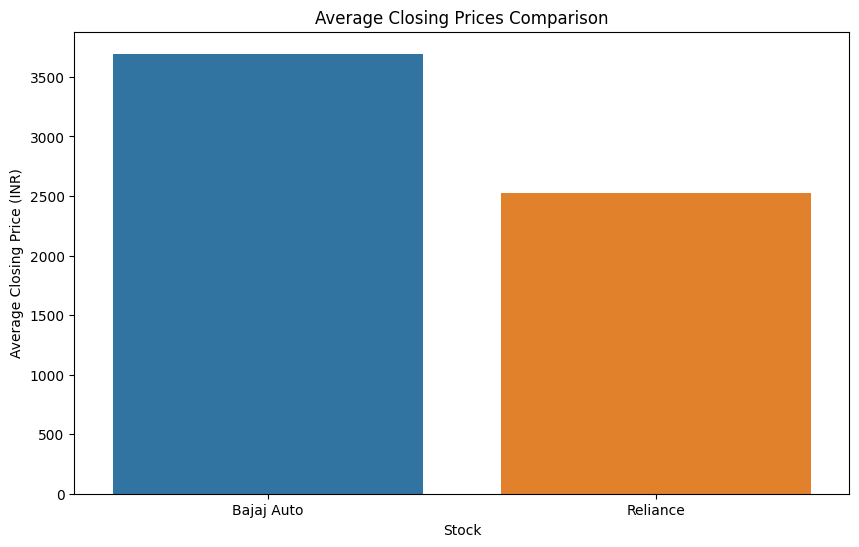

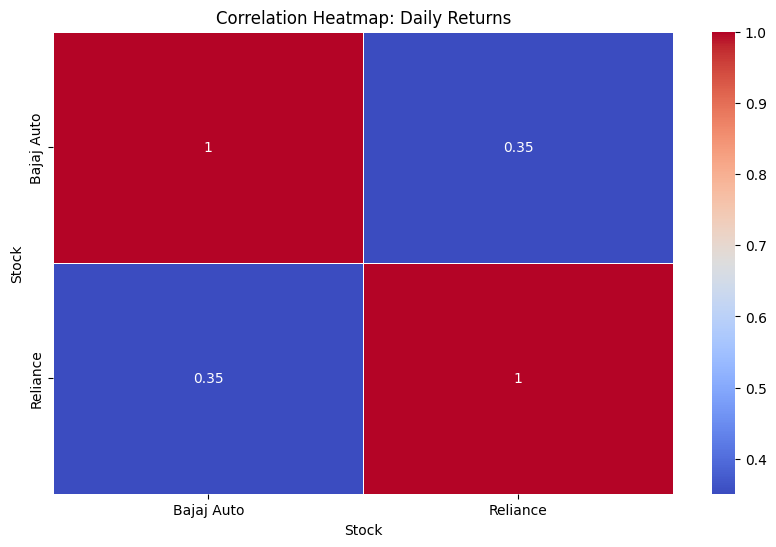

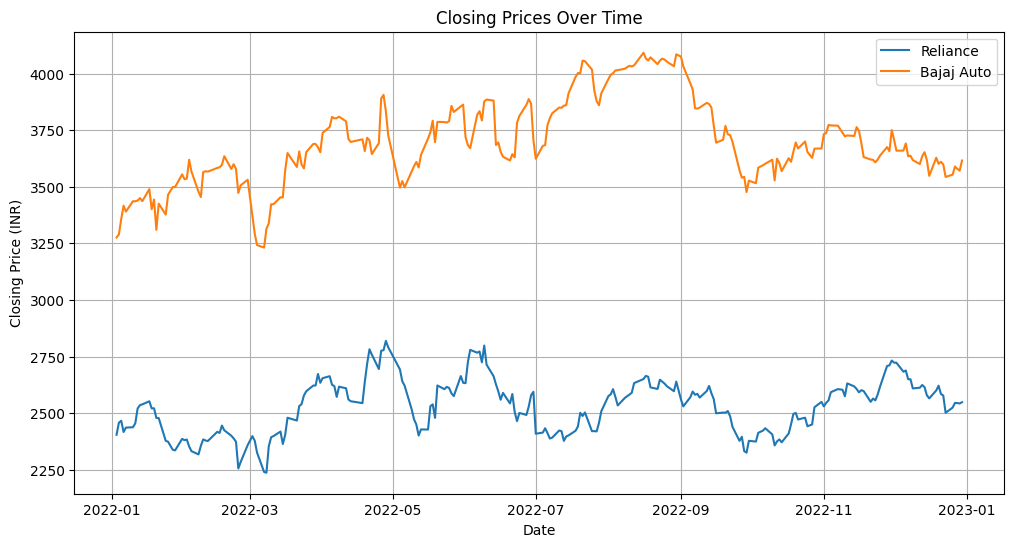

Conclusion:
The visualizations provide insights into the comparison of Reliance Industries and Bajaj Auto over the past year.
1. Boxplot indicates the distribution of closing prices for both stocks.
2. Bar graph shows the average closing prices, allowing for a quick comparison.
3. Correlation Heatmap visualizes the correlation between daily returns of both stocks.
4. Line plot illustrates the trend in closing prices over time.


In [ ]:
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Define the stock symbols
reliance_symbol = "RELIANCE.BO"
bajaj_auto_symbol = "BAJAJ-AUTO.BO"

# Set the start and end dates for fetching historical data (1-year period)
start_date = "2022-01-01"
end_date = "2023-01-01"

# Fetch historical stock data using yfinance
reliance_data = yf.download(reliance_symbol, start=start_date, end=end_date)
bajaj_auto_data = yf.download(bajaj_auto_symbol, start=start_date, end=end_date)

# Combine the data for easier comparison
reliance_data['Stock'] = 'Reliance'
bajaj_auto_data['Stock'] = 'Bajaj Auto'
combined_data = pd.concat([reliance_data, bajaj_auto_data])

# Visualizations

# Boxplot for Closing Prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stock', y='Close', data=combined_data)
plt.title("Boxplot: Closing Prices Comparison")
plt.ylabel("Closing Price (INR)")
plt.show()

# Bar graph for Average Closing Prices
average_closing_prices = combined_data.groupby('Stock')['Close'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Stock', y='Close', data=average_closing_prices)
plt.title("Average Closing Prices Comparison")
plt.ylabel("Average Closing Price (INR)")
plt.show()



# Correlation Heatmap for Daily Returns
plt.figure(figsize=(10, 6))
heatmap_data = combined_data.pivot_table(values='Close', index=combined_data.index.date, columns='Stock')
sns.heatmap(heatmap_data.pct_change().corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap: Daily Returns")
plt.show()

# Line plot for Closing Prices over time
plt.figure(figsize=(12, 6))
plt.plot(reliance_data['Close'], label='Reliance')
plt.plot(bajaj_auto_data['Close'], label='Bajaj Auto')
plt.title("Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (INR)")
plt.legend()
plt.grid(True)
plt.show()

# Conclusion
print("Conclusion:")
print("The visualizations provide insights into the comparison of Reliance Industries and Bajaj Auto over the past year.")
print("1. Boxplot indicates the distribution of closing prices for both stocks.")
print("2. Bar graph shows the average closing prices, allowing for a quick comparison.")
print("3. Correlation Heatmap visualizes the correlation between daily returns of both stocks.")
print("4. Line plot illustrates the trend in closing prices over time.")
